In [127]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import scipy.sparse

from tqdm import tqdm_notebook as tqdm

%matplotlib inline

## Вспомогательные функции

# Изучение ретроспективы 3 уровня

In [2]:
retro_lvl3 = scipy.sparse.load_npz('./retro/lvl3_dstr_2h_full_count_sparse.npz')

In [3]:
retro_lvl3.shape

(371, 1223471)

In [112]:
for i in np.argwhere((retro_lvl3 < 0).toarray().any(axis=0)).ravel():
    print(i, 'й столбец содержит отрицательные (!) значения, исправим...')
    for j in range(retro_lvl3.shape[0]):
        retro_lvl3[j, i] = 0
        print(j, end=' ')

## Количество в теме

In [113]:
bytopic_sums = np.array(list(retro_lvl3.sum(axis=0)[0].ravel())[0].ravel()).ravel()

In [114]:
bytopic_sums[:5]

array([1, 2, 1, 1, 1], dtype=int64)

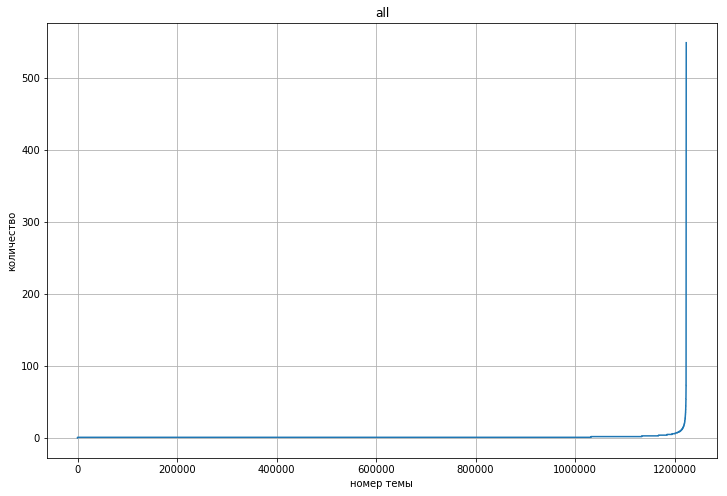

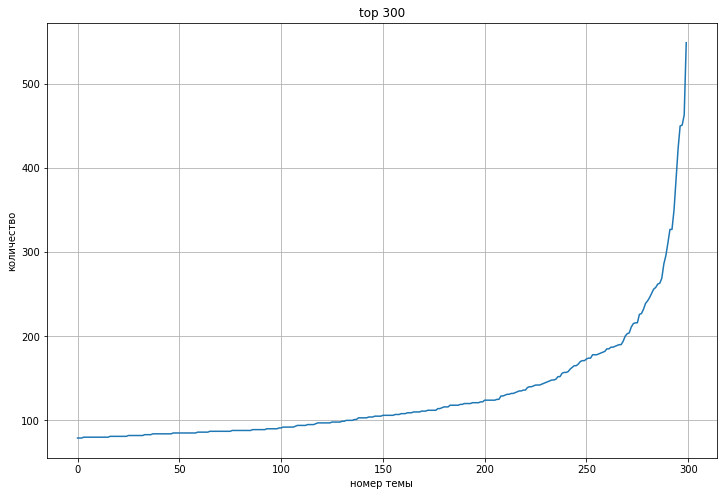

In [247]:
plt.figure(figsize=(12, 8))
plt.plot(sorted(bytopic_sums))
plt.grid()
plt.xlabel('номер темы')
plt.ylabel('количество')
plt.title('all')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(sorted(bytopic_sums)[-300:])
plt.grid()
plt.xlabel('номер темы')
plt.ylabel('количество')
plt.title('top 300')
plt.show()

## Самые популярные темы

In [117]:
top_indices = np.argwhere(bytopic_sums > 100).ravel()

In [118]:
top_indices[:5]

array([155, 568, 589, 693, 901])

In [131]:
retro_lvl3[:, 0].toarray().ravel()

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

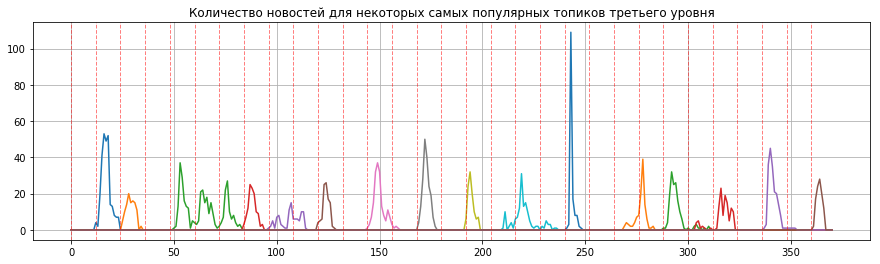

In [221]:
plt.figure(figsize=(15, 4))

i = 2
while True:
    i += 10
    if i >= len(top_indices):
        break
    plt.plot(retro_lvl3[:, top_indices[i]].toarray().ravel())

for i in range(31):
    plt.axvline(x=i*12, color='red', ls='--', lw=1, alpha=0.5)
plt.title('Количество новостей для некоторых самых популярных топиков третьего уровня')
plt.grid()
plt.show()

retro_lvl3[:, top_indices[3]].toarray().ravel()

## Время жизни топиков

In [205]:
topic_lifetime = np.zeros((retro_lvl3.shape[1], 3))
topic_lifetime[:, 0] = np.ones(retro_lvl3.shape[1]) * (retro_lvl3.shape[0] + 1)

In [206]:
 argwh = np.argwhere(retro_lvl3.toarray())

In [207]:
argwh[-5:]

array([[    370, 1223466],
       [    370, 1223467],
       [    370, 1223468],
       [    370, 1223469],
       [    370, 1223470]])

In [208]:
argwh.shape

(1420502, 2)

In [209]:
for i in tqdm(range(argwh.shape[0])):
    topic = argwh[i, 1]
    topic_lifetime[topic, 0] = min(topic_lifetime[topic, 0], argwh[i, 0])
    topic_lifetime[topic, 1] = max(topic_lifetime[topic, 1], argwh[i, 0])
    topic_lifetime[topic, 2] = topic_lifetime[topic, 2] + 1

A Jupyter Widget

In [210]:
topic_life = topic_lifetime[:, 1] - topic_lifetime[:, 0]
topic_life[np.argwhere(topic_life < 0)] = 0
topic_lifetime.min()

0.0

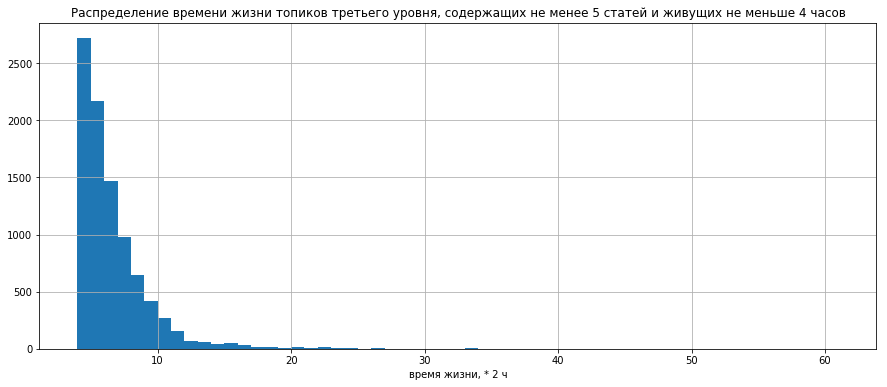

In [274]:
MIN_ARTICLES = 5
MIN_LIFETIME = 4 # в часах

plt.figure(figsize=(15, 6))
plt.title('Распределение времени жизни топиков третьего уровня, содержащих не менее {} статей и живущих не меньше {} часов'.format(MIN_ARTICLES, MIN_LIFETIME))
plt.hist(topic_life[np.logical_and(topic_life > MIN_LIFETIME / 2, topic_lifetime[:, 2] >= MIN_ARTICLES)], bins=57)
plt.xlabel('время жизни, * 2 ч')
plt.grid()

plt.show()

In [265]:
print('Среднее время жизни топика                          : {} часа'.format(
    topic_life.mean()))

print('Среднее время жизни топика (c более чем {} статьями) : {} часа'.format(5, 
    topic_life[topic_lifetime[:, 2]>=5].mean() * 2))

print('Среднее время жизни топика (c более чем {} статьями): {} часа'.format(10, 
    topic_life[topic_lifetime[:, 2]>=10].mean() * 2))

print('Среднее время жизни топика (c более чем {} статьями): {} часа'.format(20, 
    topic_life[topic_lifetime[:, 2]>=20].mean() * 2))

Среднее время жизни топика                          : 0.18452092448451987 часа
Среднее время жизни топика (c более чем 5 статьями) : 12.309098824553766 часа
Среднее время жизни топика (c более чем 10 статьями): 25.927007299270073 часа
Среднее время жизни топика (c более чем 20 статьями): 56.526315789473685 часа


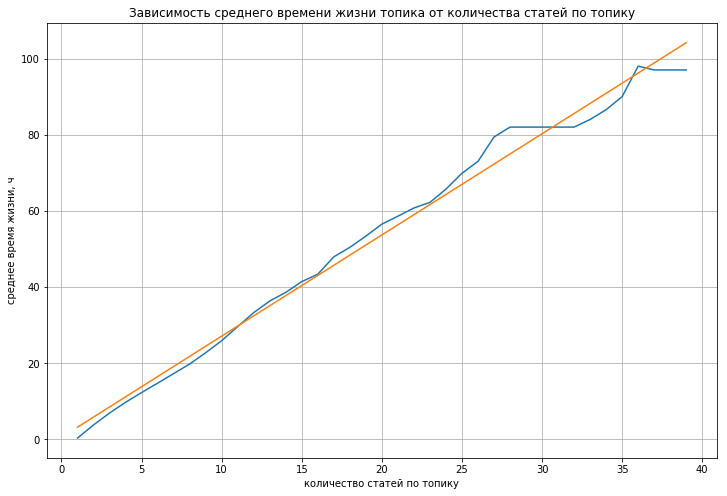

In [279]:
topic_life_of_articles_count = []
grd = np.arange(1, 40)

for i in grd:
    topic_life_of_articles_count.append(topic_life[topic_lifetime[:, 2]>=i].mean() * 2)

plt.figure(figsize=(12, 8))
plt.plot(grd, topic_life_of_articles_count)


poly = np.polyfit(grd, topic_life_of_articles_count, 1)
p = np.poly1d(poly)
plt.plot(grd, p(grd))

plt.grid()
plt.title('Зависимость среднего времени жизни топика от количества статей по топику')
plt.ylabel('среднее время жизни, ч')
plt.xlabel('количество статей по топику')
plt.show()

In [233]:
import collections

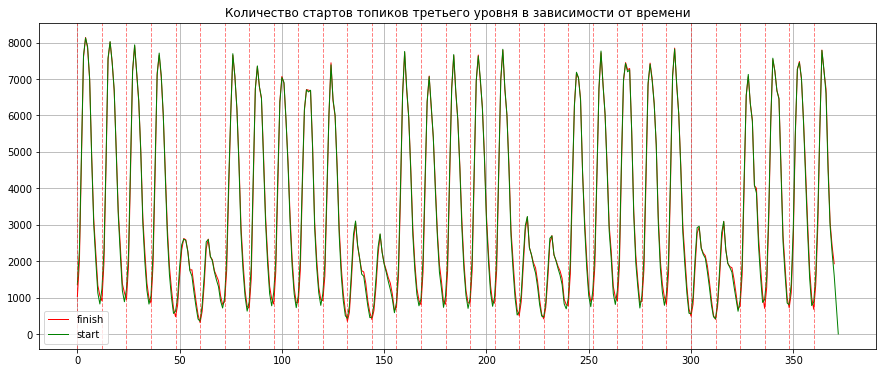

In [278]:
plt.figure(figsize=(15, 6))

finish_keys, finish_values =  zip(*list(sorted((collections.Counter(topic_lifetime[:, 1])).items())))
plt.plot(finish_keys, finish_values, color='red', label='finish', lw=1)
start_keys, start_values =  zip(*list(sorted((collections.Counter(topic_lifetime[:, 0])).items())))
plt.plot(start_keys, start_values, color='green', label='start', lw=1)

for i in range(31):
    plt.axvline(x=i*12, color='red', ls='--', lw=1, alpha=0.5)
plt.title('')
plt.grid()
plt.legend()
plt.title('Количество стартов топиков третьего уровня в зависимости от времени')
plt.show()

# TODO

* Получить примерное распределение для топика

* Посмотреть на квантили

* Вытаскивать фичи